In [11]:
# %pip install scipy --upgrade
# %pip install numpy --upgrade

In [12]:
import os
import grblc
from grblc.fitting import Model, Lightcurve, OutlierPlot, io
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

In [20]:
import glob
path = '/Users/elias/Desktop/BAERI/for-fitting-double_w07_with_cuts/*.txt'
files = glob.glob(path)
filelist=[]
sample=[]
for file in files:
    sample.append(file.split(sep="\\")[-1][0:7])
#    print(sample)
    filelist.append(file)
#    print(filelist)
filedf=pd.DataFrame()
filedf['sample'] = sample
filedf['files'] = filelist
filedf.to_csv(path.replace('*.txt', '') + 'to_fit.csv')

In [21]:
#for files in filelist:
#    print(pd.read_csv(files, sep='\t'))

filedf = pd.read_csv('/Users/elias/Desktop/BAERI/for-fitting-double_w07_with_cuts/to_fit.csv', sep=',', header=0, index_col='sample', engine='python')
print(filedf)
filedf=filedf.sort_values("sample")
#print(filedf)
tag=""
count =1

         Unnamed: 0                                              files
sample                                                                
190829A           0  /Users/elias/Desktop/BAERI/for-fitting-double_...
191011A           1  /Users/elias/Desktop/BAERI/for-fitting-double_...
191221B           2  /Users/elias/Desktop/BAERI/for-fitting-double_...
200219A           3  /Users/elias/Desktop/BAERI/for-fitting-double_...
200411A           4  /Users/elias/Desktop/BAERI/for-fitting-double_...
200826A           5  /Users/elias/Desktop/BAERI/for-fitting-double_...
200829A           6  /Users/elias/Desktop/BAERI/for-fitting-double_...
201014A           7  /Users/elias/Desktop/BAERI/for-fitting-double_...
201021C           8  /Users/elias/Desktop/BAERI/for-fitting-double_...
201024A           9  /Users/elias/Desktop/BAERI/for-fitting-double_...
201103B          10  /Users/elias/Desktop/BAERI/for-fitting-double_...
201221A          11  /Users/elias/Desktop/BAERI/for-fitting-double_...
210210

In [15]:
filedf.index[5]

'191031D'

# 1/34 190829A

###/Users/elias/Desktop/BAERI/for-fitting-double_w07_with_cuts\190829A.txt

#Double Willingale

8


C:\Users\elias\AppData\Local\Temp/ipykernel_3828/2956004607.py:553: UserWarning: Initial guess t0=0.0 may not be on or outside the bounds (0 < 0.0 (t0) < 10). Moving 't0' slightly inwards by 1e-5.
  fit = lc_w07_w07.fit(p0=[-6.76558697, 4, 2.2, 0, -8.6335, 1.183996, 3.438, 3], run_mcmc=mcmc, emcee_kwargs=dict(burn=10, steps=50, thin=5))
100%|██████████| 50/50 [00:06<00:00,  8.03it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 6 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1;
tau: [5.38229253 4.91643537 5.13782745 4.84514995 4.91014806 5.10789208]
Clear


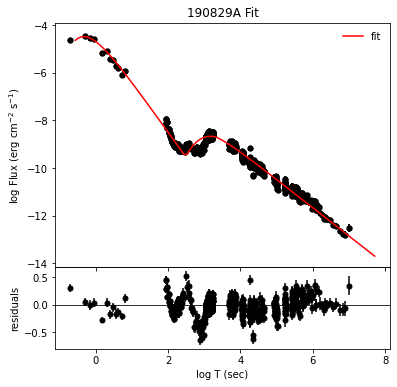

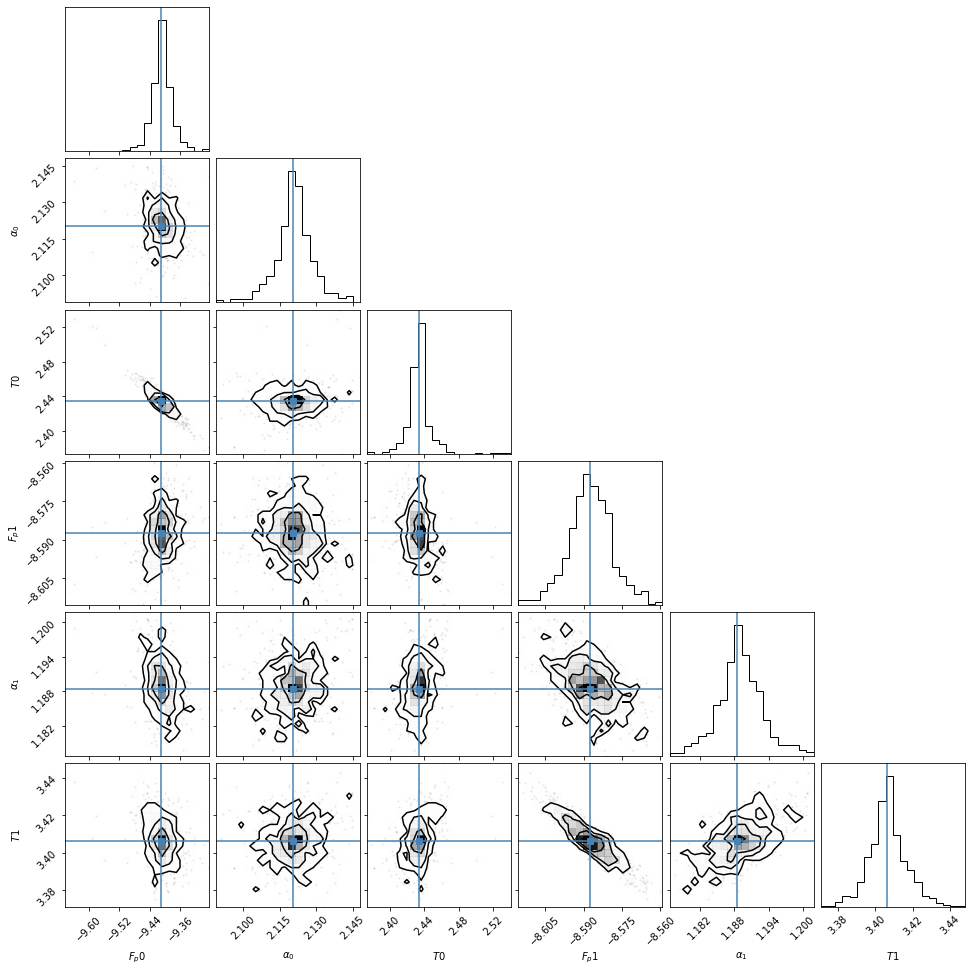

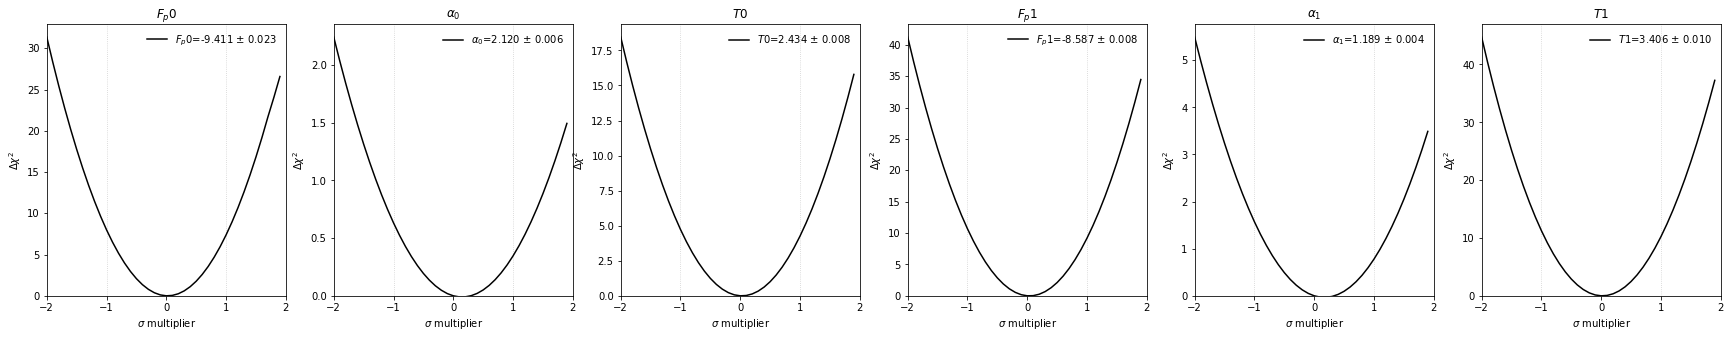

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 5000
    # data points      = 1007
    # variables        = 6
    chi-square         = 2382.06724
    reduced chi-square = 2.37968756
    Akaike info crit   = 879.020039
    Bayesian info crit = 908.508424
[[Variables]]
    F_p0:    -9.41070659 +/- 0.02250866 (0.24%) (init = -9.411369)
    alpha_0:  2.12039418 +/- 0.00631058 (0.30%) (init = 2.12139)
    T0:       2.43426297 +/- 0.00811799 (0.33%) (init = 2.434519)
    t0:       0 (fixed)
    F_p1:    -8.58738291 +/- 0.00773590 (0.09%) (init = -8.586948)
    alpha_1:  1.18850034 +/- 0.00361642 (0.30%) (init = 1.189202)
    T1:       3.40640655 +/- 0.00974555 (0.29%) (init = 3.406353)
    t1:       3 (fixed)


In [28]:
#for grb in filedf.index[4:5]:
for grb in filedf.index[0:1]:
# for grb in filedf.index[0:1]:   
#for grb in filedf.index:

    display(Markdown(f"# {count}/{len(filedf)} {grb}"))

    files = filedf.loc[grb, 'files']
    # if there are 1 file concerning grb, files are recognized as characters
    if len(files) > 10:
      files = [files]
    for file in files:
        if tag.casefold() in file:
            display(Markdown(f"###{file}"))

## """""""""""""""""""""""""""""""""""""""""
## Power Law
##""""""""""""""""""""""""""""""""""""""""""

    #         try:
    #             df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
    # #                print(df)
    #             df = df[df['flux_err']!=0]
    # #                print(df)
    #             df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
    #             model_pl = Model.POWER_LAW()
    #             model_name_pl = "power_law"
    #             display(Markdown(f"# Power Law"))
    #             t_initial = np.log10(min(df['time_sec'].values))
    #             #t_initial = min(df['time_sec'].values)
    #             t_final = np.log10(max(df['time_sec'].values))
    #             #t_final = max(df['time_sec'].values)
    #             lc_pl = Lightcurve(
    #                 name=grb,
    #                 #xdata=df["time_sec"].values,
    #                 xdata=np.log10(df["time_sec"].values),
    #                 #ydata=df["flux"].values,
    #                 ydata=np.log10(df["flux"].values),
    #                 #yerr=df["flux_err"].values,
    #                 yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
    #                 model=model_pl,
    #                 #data_space='lin',
    #                 data_space='log',
    #             )
    #             lc_pl.set_bounds(xmin=t_initial, xmax=t_final)
    #             mcmc = True
    #             fit = lc_pl.fit(p0=[-12, 4], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=500, thin=5))
    #             lc_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_pl)
    #             lc_pl.save_fitting(detailed=True, model_name=model_name_pl)
    #         except Exception as e:
    #             print("Error: ", e)
## """""""""""""""""""""""""""""""""""""""""
## Broken Power Law
#""""""""""""""""""""""""""""""""""""""""""
            # try:
            #     df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
            #     df = df[df['flux_err']!=0]
            #     df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
            #     model_bpl = Model.SIMPLE_BPL()
            #     model_name_bpl="broken_power_law"
            #     display(Markdown(f"#Broken Power Law"))
            #     # constrain the fitted T & F to be within the domain of our data points.
            #     t_initial = np.log10(min(df['time_sec'].values))
            #     #t_initial = min(df['time_sec'].values)
            #     t_final = np.log10(max(df['time_sec'].values))
            #     #t_final = max(df['time_sec'].values)
            #     model_bpl["T"].min = t_initial
            #     model_bpl["T"].max = t_final
            #     model_bpl["F"].min = np.log10(min(df["flux"].values))-5
            #     #model_bpl["F"].min = min(df["flux"].values) / 10**5
            #     model_bpl["F"].max = np.log10(max(df["flux"].values))+5
            #     #model_bpl["F"].max = max(df["flux"].values) * 10**5
            #     lc_bpl = Lightcurve(
            #         name=grb,
            #         #xdata=df["time_sec"].values,
            #         xdata=np.log10(df["time_sec"].values),
            #         #ydata=df["flux"].values,
            #         ydata=np.log10(df["flux"].values),
            #         #yerr=df["flux_err"].values,
            #         yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
            #         model=model_bpl,
            #         #data_space='lin',
            #         data_space='log',
            #     )
            #     lc_bpl.set_bounds(xmin=t_initial, xmax=t_final)
            #     mcmc = True
            #     T_bpl = (t_initial + t_final)/2
            #     F_bpl = (model_bpl["F"].min + model_bpl["F"].max) / 2
            #     mcmc = True
            #     fit = lc_bpl.fit(p0=[T_bpl,  F_bpl, 1, 1], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=500, thin=5))
            #     lc_bpl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_bpl)
            #     lc_bpl.save_fitting(detailed=True, model_name=model_name_bpl)
            # except Exception as e:
            #     print("Error: ", e)

# """""""""""""""""""""""""""""""""""""""""
# Willingale
#""""""""""""""""""""""""""""""""""""""""""
            # try:
            #     df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
            #     df = df[df['flux_err']!=0]
            #     df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
            #     model_w07 = Model.W07(vary_t=False)
            #     model_name_w07="willingale"
            #     display(Markdown(f"#Willingale"))
            #     # constrain the fitted T & F to be within the domain of our data points.
            #     t_initial = np.log10(min(df['time_sec'].values))
            #     #t_initial = min(df['time_sec'].values)
            #     t_final = np.log10(max(df['time_sec'].values))
            #     #t_final = max(df['time_sec'].values)
            #     model_w07["T"].min = t_initial
            #     model_w07["T"].max = t_final
            #     model_w07["F"].min = np.log10(min(df["flux"].values))-5
            #     model_w07["F"].max = np.log10(max(df["flux"].values))+5
            #     lc_w07 = Lightcurve(
            #             name=grb,
            #             #xdata=df["time_sec"].values,
            #             xdata=np.log10(df["time_sec"].values),
            #             #ydata=df["flux"].values,
            #             ydata=np.log10(df["flux"].values),
            #             #yerr=df["flux_err"].values,
            #             yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
            #             model=model_w07,
            #             #data_space='lin',
            #             data_space='log'
            #         )
            #     lc_w07.set_bounds(xmin=t_initial, xmax=t_final)
            #     T_w07 = np.log10(np.median(df['time_sec'].values))
            #     F_w07 = np.log10(np.mean(df['flux'].values))
            #     mcmc = True
            #     fit = lc_w07.fit(p0=[T_w07,  F_w07, 4, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=500, thin=5))
            #     lc_w07.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07)
            #     lc_w07.save_fitting(detailed=True, model_name=model_name_w07)
            # except Exception as e:
            #     print("Error: ", e)
## """""""""""""""""""""""""""""""""""""""""""""""""""""
## Power Law + Broken Power Law
##""""""""""""""""""""""""""""""""""""""""""""""""""""""
            # try:
            #     df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
            #     df = df[df['flux_err']!=0]
            #     df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
            #     model_pl_bpl = Model.POWER_LAW_SIMPLE_BPL()
            #     model_name_pl_bpl="pl_bpl"
            #     display(Markdown(f"#Power Law + Broken Power Law"))
            #     t_initial = np.log10(min(df['time_sec'].values))
            #     t_final = np.log10(max(df['time_sec'].values))
            #     model_pl_bpl["t0"].min = t_initial
            #     model_pl_bpl["t0"].max = t_final
            #     model_pl_bpl["t1"].min = t_initial
            #     model_pl_bpl["t1"].max = t_final    
            #     lc_pl_bpl = Lightcurve(
            #         name=grb,
            #         #xdata=df["time_sec"].values,
            #         xdata=np.log10(df["time_sec"].values),
            #         #ydata=df["flux"].values,
            #         ydata=np.log10(df["flux"].values),
            #         #yerr=df["flux_err"].values,
            #         yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
            #         model=model_pl_bpl,
            #         #data_space='lin',
            #         data_space='log',
            #     )
            #     lc_pl_bpl.set_bounds(xmin=t_initial, xmax=t_final)
            #     t0_pl_bpl = np.log10(np.percentile(df['time_sec'].values, 25))
            #     t1_pl_bpl = np.log10(np.percentile(df['time_sec'].values, 50))
            #     F_p_pl_bpl = np.log10(np.max(df['flux'].values))
            #     F_a_pl_bpl = np.log10(np.mean(df['flux'].values))
            #     mcmc = True
            #     fit = lc_pl_bpl.fit(p0=[F_p_pl_bpl, 2, 1, 2, t0_pl_bpl, t1_pl_bpl], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
            #     cnt=0
            #     while fit.params["t0"].value > fit.params["t1"].value and cnt <2:
            #         fit = lc_pl_bpl.fit(p0=[F_p_pl_bpl, 2, 1, 2, fit.params["t1"].value, fit.params["t0"].value], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
            #         cnt += 1
            #     lc_pl_bpl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_pl_bpl)
            #     lc_pl_bpl.save_fitting(detailed=True, model_name=model_name_pl_bpl)
            # except Exception as e:
            #     print("Error: ", e)
## """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
## Power Law + Broken Power Law + Power Law
##""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#            try:
#                df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                df = df[df['flux_err']!=0]
#                df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                model_pl_bpl_pl = Model.POWER_LAW_SIMPLE_BPL_POWER_LAW()
#                model_name_pl_bpl_pl="pl_bpl_pl"
#                display(Markdown(f"#Power Law + Broken Power Law + Power Law"))
#                t_initial = np.log10(min(df['time_sec'].values))
#                t_final = np.log10(max(df['time_sec'].values))
#                model_pl_bpl_pl["t0"].min = t_initial
#                model_pl_bpl_pl["t0"].max = t_final
#                model_pl_bpl_pl["t1"].min = t_initial
#                model_pl_bpl_pl["t1"].max = t_final  
#                model_pl_bpl_pl["t2"].min = t_initial
#                model_pl_bpl_pl["t2"].max = t_final    
#        
#                lc_pl_bpl_pl = Lightcurve(
#                    name=grb,
#                    #xdata=df["time_sec"].values,
#                    xdata=np.log10(df["time_sec"].values),
#                    #ydata=df["flux"].values,
#                    ydata=np.log10(df["flux"].values),
#                    #yerr=df["flux_err"].values,
#                    yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
#                    model=model_pl_bpl_pl,
#                    #data_space='lin',
#                    data_space='log',
#                )
#                lc_pl_bpl_pl.set_bounds(xmin=t_initial, xmax=t_final)
#                t0_pl_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 25))
#                t1_pl_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 50))
#                t2_pl_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 75))
#                F_p_pl_bpl_pl = np.log10(np.max(df['flux'].values))
#                mcmc = True
#                fit = lc_pl_bpl_pl.fit(p0=[F_p_pl_bpl_pl, 4, 0.5, 1.3, 2,  t0_pl_bpl_pl, t1_pl_bpl_pl, t2_pl_bpl_pl], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                cnt_tmp=0
#                while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                  if sorted(list(ts)) == list(ts):
#                    break
#                  else:
#                    display(Markdown(f"### Re-fitting"))
#                    fit = lc_pl_bpl_pl.fit(p0=[F_p_pl_bpl_pl, 4, 0.5, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2]], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                  cnt_tmp += 1
#                lc_pl_bpl_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_pl_bpl_pl)
#                lc_pl_bpl_pl.save_fitting(detailed=True, model_name=model_name_pl_bpl_pl)
#            except Exception as e:
#                print("Error: ", e)
## """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
## Willingale + Broken Power Law 
##""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#            try:
#                df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                df = df[df['flux_err']!=0]
#                df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                model_w07_bpl = Model.W07_SIMPLE_BPL()
#                model_name_w07_bpl="W07_bpl"
#                display(Markdown(f"#Willingale + Broken Power Law"))
#                t_initial = np.log10(min(df['time_sec'].values))
#                t_final = np.log10(max(df['time_sec'].values))
#                model_w07_bpl["t0"].min = t_initial
#                model_w07_bpl["t0"].max = t_final
#                model_w07_bpl["t1"].min = t_initial
#                model_w07_bpl["t1"].max = t_final  
#                model_w07_bpl["t2"].min = t_initial
#                model_w07_bpl["t2"].max = t_final    
#                lc_w07_bpl = Lightcurve(
#                    name=grb,
#                    xdata=df["time_sec"].values,
#                    ydata=df["flux"].values,
#                    yerr=df["flux_err"].values,
#                    model=model_w07_bpl,
#                    data_space='lin',
#                )
#                lc_w07_bpl.set_bounds(xmin=t_initial, xmax=t_final)
#                t0_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 25))
#                t1_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 50))
#                t2_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 75))
#                F_p_w07_bpl = np.log10(np.max(df['flux'].values))
#                F_a_w07_bpl = np.log10(np.mean(df['flux'].values))
#                mcmc = True
#                lc_w07_bpl.model["t"].vary=False
#                fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3,  t0_w07_bpl, t1_w07_bpl, t2_w07_bpl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                cnt_tmp=0
#                ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                  if sorted(list(ts)) == list(ts):
#                    break
#                  else:
#                    display(Markdown(f"### Re-fitting"))
#                    fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                  cnt_tmp += 1
## When fixing t = 0, comment out this part
##                if fit.params["t"].value > fit.params["t0"].value:
##                  display(Markdown(f"# Fixing t"))
##                  lc_w07_bpl.model["t"].vary=False
##                  fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, t0_w07_bpl, t1_w07_bpl, t2_w07_bpl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                  cnt_tmp=0
##                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
##                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
##                    ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
##                    if sorted(list(ts)) == list(ts):
##                      break
##                    else:
##                      display(Markdown(f"# Re-fitting because of time conversion"))
##                      lc_w07_bpl.model["t"].vary=False
##                      fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                    cnt_tmp += 1
# Until here
#                lc_w07_bpl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07_bpl)
#                lc_w07_bpl.save_fitting(detailed=True, model_name=model_name_w07_bpl)
#            except Exception as e:
#                print("Error: ", e)

## """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
## Broken Power Law + Willingale
##""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    #         try:
    #             df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
    #             df = df[df['flux_err']!=0]
    #             df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
    #             model_bpl_w07 = Model.SIMPLE_BPL_W07()
    #             model_name_bpl_w07="BPL_W07"
    #             display(Markdown(f"#Broken Power Law + Willingale"))
    #             t_initial = np.log10(min(df['time_sec'].values))
    #             t_final = np.log10(max(df['time_sec'].values))
    #             model_bpl_w07["T_bpl"].min = t_initial
    #             model_bpl_w07["T_bpl"].max = t_final
    #             model_bpl_w07["T_a"].min = t_initial
    #             model_bpl_w07["T_a"].max = t_final  
    #             model_bpl_w07["t_a"].min = t_initial
    #             model_bpl_w07["t_a"].max = t_final    
    #             lc_bpl_w07 = Lightcurve(
    #                 name=grb,
    #                 xdata=df["time_sec"].values,
    #                 ydata=df["flux"].values,
    #                 yerr=df["flux_err"].values,
    #                 model=model_bpl_w07,
    #                 data_space='lin',
    #             )
    #             lc_bpl_w07.set_bounds(xmin=t_initial, xmax=t_final)
    #             # t0_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 25))
    #             # t1_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 50))
    #             # t2_w07_bpl = np.log10(np.percentile(df['time_sec'].values, 75))
    #             F_p_w07_bpl = np.log10(np.max(df['flux'].values))
    #             # F_a_w07_bpl = np.log10(np.mean(df['flux'].values))
    #             mcmc = True
    #             # lc_bpl_w07.model["F_bpl"].vary=False
    #             lc_bpl_w07.model["T_bpl"].vary=False
    #             # lc_bpl_w07.model["alpha_1"].vary=False
    #             # lc_bpl_w07.model["alpha_2"].vary=False
    #             # lc_bpl_w07.model["F_a"].vary=False
    #             # lc_bpl_w07.model["T_a"].vary=False
    #             # lc_bpl_w07.model["t_a"].vary=False
    #             # lc_bpl_w07.model["alpha_a"].vary=False
    #             fit = lc_bpl_w07.fit(p0=[-7, -1.6, 1, 2, -11, 5, 1.5, 3], run_mcmc=mcmc, emcee_kwargs=dict(burn=10, steps=50, thin=5))
    #             # cnt_tmp=0
    #             # ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
    #             # while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
    #             #     ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
    #             #     if sorted(list(ts)) == list(ts):
    #             #     break
    #             #     else:
    #             #     display(Markdown(f"### Re-fitting"))
    #             #     fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
    #             #     cnt_tmp += 1
    # # When fixing t = 0, comment out this part
    # #                if fit.params["t"].value > fit.params["t0"].value:
    # #                  display(Markdown(f"# Fixing t"))
    # #                  lc_w07_bpl.model["t"].vary=False
    # #                  fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, t0_w07_bpl, t1_w07_bpl, t2_w07_bpl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
    # #                  cnt_tmp=0
    # #                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
    # #                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
    # #                    ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
    # #                    if sorted(list(ts)) == list(ts):
    # #                      break
    # #                    else:
    # #                      display(Markdown(f"# Re-fitting because of time conversion"))
    # #                      lc_w07_bpl.model["t"].vary=False
    # #                      fit = lc_w07_bpl.fit(p0=[F_p_w07_bpl, 4, 0.5, 1.3, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
    # #                    cnt_tmp += 1
    # # Until here
    #             lc_bpl_w07.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_bpl_w07)
    #             lc_bpl_w07.save_fitting(detailed=True, model_name=model_name_bpl_w07)
    #         except Exception as e:
    #             print("Error: ", e)
# """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Willingale + Power Law 
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             try:
#                 df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                 df = df[df['flux_err']!=0]
#                 df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                 model_w07_pl = Model.W07_POWER_LAW()
#                 model_name_w07_pl="W07_PL"
#                 display(Markdown(f"#Willingale + Power Law"))
#                 t_initial = np.log10(min(df['time_sec'].values))
#                 t_final = np.log10(max(df['time_sec'].values))
#                 model_w07_pl["t0"].min = t_initial
#                 model_w07_pl["t0"].max = t_final
#                 model_w07_pl["t1"].min = t_initial
#                 model_w07_pl["t1"].max = t_final  
        
#                 lc_w07_pl = Lightcurve(
#                     name=grb,
#                     #xdata=df["time_sec"].values,
#                     xdata=np.log10(df["time_sec"].values),
#                     #ydata=df["flux"].values,
#                     ydata=np.log10(df["flux"].values),
#                     #yerr=df["flux_err"].values,
#                     yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
#                     model=model_w07_pl,
#                     #data_space='lin',
#                     data_space='log'
#                 )
#                 lc_w07_pl.set_bounds(xmin=t_initial, xmax=t_final)
#                 t0_w07_pl = np.log10(np.percentile(df['time_sec'].values, 25))
#                 t1_w07_pl = np.log10(np.percentile(df['time_sec'].values, 50))
#                 F_p_w07_pl = np.log10(np.max(df['flux'].values))
#                 mcmc = True
#                 lc_w07_pl.model["t1"].vary=False
#                 fit = lc_w07_pl.fit(p0=[-6, 1.5, 1.5, 2, 1, 4.05], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=500, thin=5))
#                 cnt_tmp=0
#                 ts=fit.params["t0"].value, fit.params["t1"].value
#                 # while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                 #   ts=fit.params["t0"].value, fit.params["t1"].value
#                 #   if sorted(list(ts)) == list(ts):
#                 #     break
#                 #   else:
#                 #     display(Markdown(f"### Re-fitting"))
#                 #     fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                 #   cnt_tmp += 1
# # When fixing t = 0, comment out this part
# #                if fit.params["t"].value > fit.params["t0"].value:
# #                  display(Markdown(f"# Fixing t = 0"))
# #                  lc_w07_pl.model["t"].vary=False
# #                  fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                  cnt_tmp=0
# #                  ts=fit.params["t0"].value, fit.params["t1"].value
# #                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
# #                    ts=fit.params["t0"].value, fit.params["t1"].value,
# #                    if sorted(list(ts)) == list(ts):
# #                      break
# #                    else:
# #                      display(Markdown(f"# Re-fitting because of time conversion"))
# #                      fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                    cnt_tmp += 1
# # Until here
#                 lc_w07_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07_pl)
#                 lc_w07_pl.save_fitting(detailed=True, model_name=model_name_w07_pl)
#             except Exception as e:
#                 print("Error: ", e)
# """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Power Law + Willingale
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             try:
#                 df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                 df = df[df['flux_err']!=0]
#                 df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                 model_pl_w07 = Model.POWER_LAW_W07(vary_t=False)
#                 model_name_pl_w07="PL_W07"
#                 display(Markdown(f"#Power Law + Willingale"))
#                 t_initial = np.log10(min(df['time_sec'].values))
#                 t_final = np.log10(max(df['time_sec'].values))
#                 model_pl_w07["tt"].min = t_initial
#                 model_pl_w07["tt"].max = t_final
#                 model_pl_w07["T_a"].min = t_initial
#                 model_pl_w07["T_a"].max = t_final
#                 lc_pl_w07 = Lightcurve(
#                     name=grb,
#                     #xdata=df["time_sec"].values,
#                     xdata=np.log10(df["time_sec"].values),
#                     #ydata=df["flux"].values,
#                     ydata=np.log10(df["flux"].values),
#                     #yerr=df["flux_err"].values,
#                     yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
#                     model=model_pl_w07,
#                     #data_space='lin',
#                     data_space='log'
#                 )
#                 lc_pl_w07.set_bounds(xmin=t_initial, xmax=t_final)
#                 tt_pl_w07 = np.log10(np.percentile(df['time_sec'].values, 35))
#                 T_a_pl_w07 = np.log10(np.percentile(df['time_sec'].values, 50))
#                 F_p_pl_w07 = np.log10(np.max(df['flux'].values))
#                 F_a_pl_w07 = np.log10(np.median(df['flux'].values))
#                 mcmc = True
#                 #lc_pl_w07.model["t"].vary=True
#                 fit = lc_pl_w07.fit(p0=[F_p_pl_w07, 1, T_a_pl_w07, F_a_pl_w07, 1, 2.6], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                 cnt_tmp=0
#                 ts=fit.params["tt"].value, fit.params["T_a"].value
#                 # while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                 #     ts=fit.params["tt"].value, fit.params["T_a"].value
#                 #     if sorted(list(ts)) == list(ts):
#                 #         break
#                 #     else:
#                 #         display(Markdown(f"### Re-fitting"))
#                 #         fit = lc_pl_w07.fit(p0=[F_p_pl_w07, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                 #     cnt_tmp += 1
# # # When fixing t = 0, comment out this part
# #                 if fit.params["t"].value > fit.params["t0"].value:
# #                     display(Markdown(f"# Fixing t = 0"))
# #                     lc_w07_pl.model["t"].vary=False
# #                     fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                     cnt_tmp=0
# #                     ts=fit.params["t0"].value, fit.params["t1"].value
# #                     while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
# #                         ts=fit.params["t0"].value, fit.params["t1"].value,
# #                         if sorted(list(ts)) == list(ts):
# #                             break
# #                         else:
# #                             display(Markdown(f"# Re-fitting because of time conversion"))
# #                         fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                     cnt_tmp += 1
# # Until here
#                 lc_pl_w07.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_pl_w07)
#                 lc_pl_w07.save_fitting(detailed=True, model_name=model_name_pl_w07)
#             except Exception as e:
#                 print("Error: ", e)
# """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Double Willingale
# #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
            try:
                df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
                df = df[df['flux_err']!=0]
                df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
                model_w07_w07= Model.DOUBLE_W07()
                model_name_w07_w07="DOUBLE WILLINGALE"
                display(Markdown(f"#Double Willingale"))
                t_initial = np.log10(min(df['time_sec'].values))
                t_final = np.log10(max(df['time_sec'].values))
                # model_w07_w07["T0"].min = t_initial
                # model_w07_w07["T0"].max = t_final
                # model_w07_w07["t0"].min = t_initial
                # model_w07_w07["t0"].max = t_final
                # model_w07_w07["T1"].min = t_initial
                # model_w07_w07["T1"].max = t_final
                # model_w07_w07["t1"].min = t_initial
                # model_w07_w07["t1"].max = t_final
                # model_w07_w07["F_p0"].min = np.log10(min(df["flux"].values))
                # model_w07_w07["F_p0"].max = np.log10(max(df["flux"].values))
                # model_w07_w07["F_p1"].min = np.log10(min(df["flux"].values))
                # model_w07_w07["F_p1"].max = np.log10(max(df["flux"].values))
        
                lc_w07_w07 = Lightcurve(
                    name=str(grb),
                    #xdata=df["time_sec"].values,
                    xdata=np.log10(df["time_sec"].values),
                    #ydata=df["flux"].values,
                    ydata=np.log10(df["flux"].values),
                    #yerr=df["flux_err"].values,
                    yerr=df["flux_err"].values/(df["flux"].values * np.log(10)),
                    model=model_w07_w07,
                    #data_space='lin',
                    data_space='log'
                )
                print(len(lc_w07_w07.model))
                lc_w07_w07.set_bounds(xmin=t_initial, xmax=t_final)
                # t0_w07_w07 = np.log10(np.percentile(df['time_sec'].values, 10))
                # T0_w07_w07 = np.log10(np.percentile(df['time_sec'].values, 20))
                # t1_w07_w07 = np.log10(np.percentile(df['time_sec'].values, 30))
                # T1_w07_w07 = np.log10(np.percentile(df['time_sec'].values, 40))
                # F_p0_w07_w07 = np.log10(np.max(df['flux'].values))
                # F_p1_w07_w07 = np.log10(np.median(df['flux'].values))
                mcmc = True

                lc_w07_w07.model["t0"].vary=False
                lc_w07_w07.model["t1"].vary=False

                fit = lc_w07_w07.fit(p0=[-6.76558697, 4, 2.2, 0, -8.6335, 1.183996, 3.438, 3], run_mcmc=mcmc, emcee_kwargs=dict(burn=10, steps=50, thin=5))
                #fit = lc_w07_w07.fit(p0=[F_p0_w07_w07, 2, 0, -0.1, F_p1_w07_w07, 1, 4, 2.5], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=500, thin=5))
                cnt_tmp=0
                ts=fit.params["t0"].value, fit.params["T0"].value, fit.params["t1"].value, fit.params["T1"].value
                print("Clear")
#                 while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                   ts=fit.params["t0"].value, fit.params["T0"].value, fit.params["t1"].value, fit.params["T1"].value
#                   if sorted(list(ts)) == list(ts):
#                     break
#                   else:
#                     display(Markdown(f"### Re-fitting"))
# #                    fit = lc_w07_w07.fit(p0=[F_p0_w07_w07, 2, sorted(ts)[0], t0_w07_w07, 1, 0, sorted(ts)[2], 2, F_p1_w07_w07, sorted(ts)[1], t1_w07_w07, 1, 4, 3], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                     fit = lc_w07_w07.fit(p0=[F_p0_w07_w07, 2, sorted(ts)[1], sorted(ts)[0], F_p1_w07_w07, 1, sorted(ts)[3], sorted(ts)[2]], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                   cnt_tmp += 1
# When fixing t = 0, comment out this part
#                if fit.params["t"].value > fit.params["t0"].value:
#                  display(Markdown(f"# Fixing t = 0"))
#                  lc_w07_pl.model["t"].vary=False
#                  fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                  cnt_tmp=0
#                  ts=fit.params["t0"].value, fit.params["t1"].value
#                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
#                    ts=fit.params["t0"].value, fit.params["t1"].value,
#                    if sorted(list(ts)) == list(ts):
#                      break
#                    else:
#                      display(Markdown(f"# Re-fitting because of time conversion"))
#                      fit = lc_w07_pl.fit(p0=[F_p_w07_pl, 2, 1, sorted(ts)[0], sorted(ts)[1], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                    cnt_tmp += 1
# Until here
                lc_w07_w07.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07_w07)
                lc_w07_w07.save_fitting(detailed=True, model_name=model_name_w07_w07)
            except Exception as e:
                print("Error: ", e)
## """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
## Willingale + Broken Power Law + Power Law 
##""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#            try:
#                df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                df = df[df['flux_err']!=0]
#                df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                model_w07_bpl_pl = Model.W07_SIMPLE_BPL_POWER_LAW()
#                model_name_w07_bpl_pl="W07_bpl_pl"
#                display(Markdown(f"#Willingale + Broken Power Law + Power Law"))
#                t_initial = np.log10(min(df['time_sec'].values))
#                t_final = np.log10(max(df['time_sec'].values))
#                model_w07_bpl_pl["t0"].min = t_initial
#                model_w07_bpl_pl["t0"].max = t_final
#                model_w07_bpl_pl["t1"].min = t_initial
#                model_w07_bpl_pl["t1"].max = t_final  
#                model_w07_bpl_pl["t2"].min = t_initial
#                model_w07_bpl_pl["t2"].max = t_final    
#                model_w07_bpl_pl["t3"].min = t_initial
#                model_w07_bpl_pl["t3"].max = t_final    
#        
#                lc_w07_bpl_pl = Lightcurve(
#                    name=grb,
#                    xdata=df["time_sec"].values,
#                    ydata=df["flux"].values,
#                    yerr=df["flux_err"].values,
#                    model=model_w07_bpl_pl,
#                    data_space='lin',
#                )
#                lc_w07_bpl_pl.set_bounds(xmin=t_initial, xmax=t_final)
#                t0_w07_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 10))
#                t1_w07_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 35))
#                t2_w07_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 65))
#                t3_w07_bpl_pl = np.log10(np.percentile(df['time_sec'].values, 90))
#                F_p_w07_bpl_pl = np.log10(np.max(df['flux'].values))
#                F_a_w07_bpl_pl = np.log10(np.mean(df['flux'].values))
#                mcmc = True
#                fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, t0_w07_bpl_pl, t1_w07_bpl_pl, t2_w07_bpl_pl, t3_w07_bpl_pl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                cnt_tmp=0
#                ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
#                while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
#                  if sorted(list(ts)) == list(ts):
#                    break
#                  else:
#                    display(Markdown(f"### Re-fitting"))
#                    fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                  cnt_tmp += 1
## When fixing t = 0, comment out this part
##                if fit.params["t"].value > fit.params["t0"].value:
##                  display(Markdown(f"# Fixing t"))
##                  lc_w07_bpl_pl.model["t"].vary=False
##                  fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, t0_w07_bpl_pl, t1_w07_bpl_pl, t2_w07_bpl_pl, t3_w07_bpl_pl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                  cnt_tmp=0
##                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
##                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
##                    ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
##                    if sorted(list(ts)) == list(ts):
##                      break
##                    else:
##                      display(Markdown(f"# Re-fitting because of time conversion"))
##                      lc_w07_bpl_pl.model["t"].vary=False
##                      fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                    cnt_tmp += 1
## Until here
#                lc_w07_bpl_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07_bpl_pl)
#                lc_w07_bpl_pl.save_fitting(detailed=True, model_name=model_name_w07_bpl_pl)
#            except Exception as e:
#                print("Error: ", e)
# """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Willingale + Willingale + Power Law 
# #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             try:
#                 df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                 df = df[df['flux_err']!=0]
#                 df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                 model_w07_w07_pl = Model.W07_W07_POWER_LAW()
#                 model_name_w07_w07_pl="W07_W07_pl"
#                 display(Markdown(f"#Double Willingale + Power Law"))
#                 t_initial = np.log10(min(df['time_sec'].values))
#                 t_final = np.log10(max(df['time_sec'].values))
#                 # model_w07_w07_pl["t0"].min = t_initial
#                 # model_w07_w07_pl["t0"].max = t_final
#                 # model_w07_w07_pl["t1"].min = t_initial
#                 # model_w07_w07_pl["t1"].max = t_final  
#                 # model_w07_w07_pl["t2"].min = t_initial
#                 # model_w07_w07_pl["t2"].max = t_final    
#                 # model_w07_w07_pl["t3"].min = t_initial
#                 # model_w07_w07_pl["t3"].max = t_final    
                
#                 lc_w07_w07_pl = Lightcurve(
#                     name=grb,
#                     xdata=df["time_sec"].values,
#                     ydata=df["flux"].values,
#                     yerr=df["flux_err"].values,
#                     model=model_w07_w07_pl,
#                     data_space='lin',
#                 )
#                 lc_w07_w07_pl.set_bounds(xmin=t_initial, xmax=t_final)
#                 # t0_w07_w07_pl = np.log10(np.percentile(df['time_sec'].values, 10))
#                 # t1_w07_w07_pl = np.log10(np.percentile(df['time_sec'].values, 35))
#                 # t2_w07_w07_pl = np.log10(np.percentile(df['time_sec'].values, 65))
#                 # t3_w07_w07_pl = np.log10(np.percentile(df['time_sec'].values, 90))
#                 # F_p_w07_w07_pl = np.log10(np.max(df['flux'].values))
#                 # F_a_w07_w07_pl = np.log10(np.mean(df['flux'].values))
#                 mcmc = True
#                 # lc_w07_w07_pl.model["F_p1"].vary=False
#                 # lc_w07_w07_pl.model["T_p1"].vary=False
#                 # lc_w07_w07_pl.model["alpha_p1"].vary=False
#                 # lc_w07_w07_pl.model["t_p1"].vary=False
#                 # lc_w07_w07_pl.model["F_p2"].vary=False
#                 # lc_w07_w07_pl.model["T_p2"].vary=False
#                 # lc_w07_w07_pl.model["alpha_p2"].vary=False
#                 # lc_w07_w07_pl.model["t_p2"].vary=False
#                 # lc_w07_w07_pl.model["F_pl"].vary=False
#                 # lc_w07_w07_pl.model["alpha_pl"].vary=False

#                 fit = lc_w07_w07_pl.fit(p0=[-8, 1.8, 2.5, 1.3, -8, 3.5, 3, 3, -7, 1], run_mcmc=mcmc, emcee_kwargs=dict(burn=10, steps=50, thin=5))
#                 # cnt_tmp=0
#                 # ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
#                 # while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                 #   ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
#                 #   if sorted(list(ts)) == list(ts):
#                 #     break
#                 #   else:
#                 #     display(Markdown(f"### Re-fitting"))
#                 #     fit = lc_w07_w07_pl.fit(p0=[F_p_w07_w07_pl, 4, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                 #   cnt_tmp += 1
# # When fixing t = 0, comment out this part
# #                if fit.params["t"].value > fit.params["t0"].value:
# #                  display(Markdown(f"# Fixing t"))
# #                  lc_w07_bpl_pl.model["t"].vary=False
# #                  fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, t0_w07_bpl_pl, t1_w07_bpl_pl, t2_w07_bpl_pl, t3_w07_bpl_pl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                  cnt_tmp=0
# #                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
# #                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
# #                    ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value, fit.params["t3"].value
# #                    if sorted(list(ts)) == list(ts):
# #                      break
# #                    else:
# #                      display(Markdown(f"# Re-fitting because of time conversion"))
# #                      lc_w07_bpl_pl.model["t"].vary=False
# #                      fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], sorted(ts)[3], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
# #                    cnt_tmp += 1
# # Until here
#                 lc_w07_w07_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_w07_w07_pl)
#                 lc_w07_w07_pl.save_fitting(detailed=True, model_name=model_name_w07_w07_pl)
#             except Exception as e:
#                 print("Error: ", e)
#         else:
#             print("No converted file")     
#     count += 1
## """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
## Power Law + Willingale + Power Law 
## """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#            try:
#                df = pd.read_csv(file, sep=r"\t+|\s+", engine='python', header=0)
#                df = df[df['flux_err']!=0]
#                df.columns = ['time_sec', 'flux', 'flux_err'] + list(np.arange(3, len(df.columns)))
#                model_pl_w07_pl = Model.POWER_LAW_W07_POWER_LAW()
#                model_name_pl_w07_pl="pl_W07_pl"
#                display(Markdown(f"#Power Law + Willingale + Power Law"))
#                t_initial = np.log10(min(df['time_sec'].values))
#                t_final = np.log10(max(df['time_sec'].values))
#                model_pl_w07_pl["t0"].min = t_initial
#                model_pl_w07_pl["t0"].max = t_final
#                model_pl_w07_pl["t1"].min = t_initial
#                model_pl_w07_pl["t1"].max = t_final  
#                model_pl_w07_pl["t2"].min = t_initial
#                model_pl_w07_pl["t2"].max = t_final    
#                
#                lc_pl_w07_pl = Lightcurve(
#                    name=grb,
#                    xdata=df["time_sec"].values,
#                    ydata=df["flux"].values,
#                    yerr=df["flux_err"].values,
#                    model=model_pl_w07_pl,
#                    data_space='lin',
#                )
#                lc_pl_w07_pl.model["t"].vary=False
#                lc_pl_w07_pl.set_bounds(xmin=t_initial, xmax=t_final)
#                t0_pl_w07_pl = np.log10(np.percentile(df['time_sec'].values, 10))
#                t1_pl_w07_pl = np.log10(np.percentile(df['time_sec'].values, 35))
#                t2_pl_w07_pl = np.log10(np.percentile(df['time_sec'].values, 65))
#                F_p_pl_w07_pl = np.log10(np.max(df['flux'].values))
#                F_a_pl_w07_pl = np.log10(np.mean(df['flux'].values))
#                mcmc = True
#                
#                fit = lc_pl_w07_pl.fit(p0=[F_p_pl_w07_pl, 4, 1.3, 2, t0_pl_w07_pl, t1_pl_w07_pl, t2_pl_w07_pl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                cnt_tmp=0
#                ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                while cnt_tmp< 2 and list(ts) != sorted(list(ts)) :
#                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
#                  if sorted(list(ts)) == list(ts):
#                    break
#                  else:
#                    display(Markdown(f"### Re-fitting"))
#                    fit = lc_pl_w07_pl.fit(p0=[F_p_pl_w07_pl, 4, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
#                  cnt_tmp += 1
## When fixing t = 0, comment out this partko
##                if fit.params["t"].value > fit.params["t0"].value:
##                  display(Markdown(f"# Fixing t"))
##                  lc_w07_bpl_pl.model["t"].vary=False
##                  fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, t0_w07_bpl_pl, t1_w07_bpl_pl, t2_w07_bpl_pl, 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                  cnt_tmp=0
##                  ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
##                  while cnt_tmp< 3 and list(ts) != sorted(list(ts)):
##                    ts=fit.params["t0"].value, fit.params["t1"].value, fit.params["t2"].value
##                    if sorted(list(ts)) == list(ts):
##                      break
##                    else:
##                      display(Markdown(f"# Re-fitting because of time conversion"))
##                      lc_w07_bpl_pl.model["t"].vary=False
##                      fit = lc_w07_bpl_pl.fit(p0=[F_p_w07_bpl_pl, 4, 0.5, 1.3, 2, sorted(ts)[0], sorted(ts)[1], sorted(ts)[2], 0], run_mcmc=mcmc, emcee_kwargs=dict(burn=100, steps=5000, thin=5))
##                    cnt_tmp += 1
## Until here
#                lc_pl_w07_pl.show_fit(detailed=True, fig_kwargs=dict(dpi=72), save_plots="png", model_name=model_name_pl_w07_pl)
#                lc_pl_w07_pl.save_fitting(detailed=True, model_name=model_name_pl_w07_pl)
#            except Exception as e:
#                print("Error: ", e)
#        else:
#            print("No converted file")     
#    count += 1